# TITANIC PASSENGERS SURIVIVAL ANALYSIS AND PREDICTION USING DECISION TREE

In [30]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [31]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
# SO HERE WE ONLY NEED THE COLUMNS SURVIVED, PCLASS, SEX, AGE AND FARE
# THE PCLASS, SEX, AGE AND FARE ARE INDEPENDENT VARIABLES
# THE SURVIVED COLUMN IS THE TARGET VARIABLE
df.drop(['PassengerId','SibSp','Name','Parch', 'Ticket', 'Cabin', 'Embarked'],axis='columns', inplace=True)

In [34]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [35]:
# LETS FIND IF THERE IS ANY MISSING VALUES IN OUR DATAFRAME
df.isna()

,Survived,Pclass,Sex,Age,Fare
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
886,False,False,False,False,False
887,False,False,False,False,False
888,False,False,False,True,False
889,False,False,False,False,False


In [36]:
# SINCE THERE IS NAN VALUES IN THE AGE COLUMN LETS FILL THOSE NAN VALUES
df['Age']=df.Age.fillna(df['Age'].mean())

In [37]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [38]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [39]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
...,...,...,...,...,...
886,0,2,male,27.000000,13.0000
887,1,1,female,19.000000,30.0000
888,0,3,female,29.699118,23.4500
889,1,1,male,26.000000,30.0000


In [42]:
# NOW IN THE SEX COLUMN SINCE IT IS TEXTUAL TEXT CONVERT INTO NUMERICAL VALUES USING LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.000000,7.2500
1,1,1,0,38.000000,71.2833
2,1,3,0,26.000000,7.9250
3,1,1,0,35.000000,53.1000
4,0,3,1,35.000000,8.0500
...,...,...,...,...,...
886,0,2,1,27.000000,13.0000
887,1,1,0,19.000000,30.0000
888,0,3,0,29.699118,23.4500
889,1,1,1,26.000000,30.0000


In [48]:
df.shape

(891, 5)

In [43]:
# NOW LETS DIVIDE THE DATAFRAME INTO INDEPENDENT AND TARGET VARIABLE 
X=df.drop('Survived',axis='columns')
Y=df.drop(['Pclass', 'Sex', 'Age', 'Fare'], axis='columns')
print(X)
print(Y)

     Pclass  Sex        Age     Fare
0         3    1  22.000000   7.2500
1         1    0  38.000000  71.2833
2         3    0  26.000000   7.9250
3         1    0  35.000000  53.1000
4         3    1  35.000000   8.0500
..      ...  ...        ...      ...
886       2    1  27.000000  13.0000
887       1    0  19.000000  30.0000
888       3    0  29.699118  23.4500
889       1    1  26.000000  30.0000
890       3    1  32.000000   7.7500

[891 rows x 4 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [45]:
# NOW LETS SPLIT THE DATASET INTO TRAINING AND TESTING SET USING TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [46]:
X_train

,Pclass,Sex,Age,Fare
217,2,1,42.000000,27.0000
291,1,0,19.000000,91.0792
548,3,1,33.000000,20.5250
590,3,1,35.000000,7.1250
315,3,0,26.000000,7.8542
...,...,...,...,...
323,2,0,22.000000,29.0000
248,1,1,37.000000,52.5542
124,1,1,54.000000,77.2875
111,3,0,14.500000,14.4542


In [49]:
X_test

,Pclass,Sex,Age,Fare
702,3,0,18.000000,14.4542
266,3,1,16.000000,39.6875
490,3,1,29.699118,19.9667
728,2,1,25.000000,26.0000
507,1,1,29.699118,26.5500
...,...,...,...,...
109,3,0,29.699118,24.1500
274,3,0,29.699118,7.7500
110,1,1,47.000000,52.0000
482,3,1,50.000000,8.0500


In [50]:
Y_train

,Survived
217,0
291,1
548,0
590,0
315,1
...,...
323,1
248,1
124,0
111,0


In [51]:
# LETS CREATE AN OBJECT OF THE DECISION TREE CLASSIFIER AND THEN TRAIN IT ON THE SPLIT INDEPENDENT VARIABLES USING 
# FIT FUNCTION
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [52]:
# NOW LETS CHECK THE SCORE/PERFORMANCE OF THE MODEL
model.score(X_test, Y_test)

0.7821229050279329

In [54]:
# LETS CHECK THE CONFUSION MATRIX TO CHECK THE PLACES WHERE THE MODEL PREDICTED WRONG
from sklearn.metrics import confusion_matrix
Y_predicted=model.predict(X_test)
cm=confusion_matrix(Y_predicted,Y_test)
cm

array([[87, 14],
       [25, 53]])

Text(50.722222222222214, 0.5, 'Actual Value')

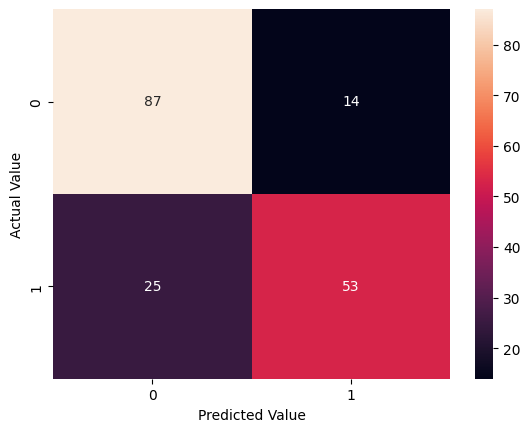

In [56]:
# NOW USING SEABORN LETS PLOT A HEATMAP OF CONFUSION MATRIX 
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

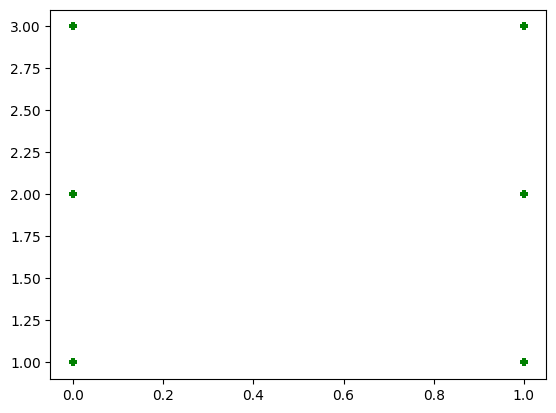

In [58]:
%matplotlib inline
plt.scatter(df['Survived'], df['Pclass'], marker='+', color='green')

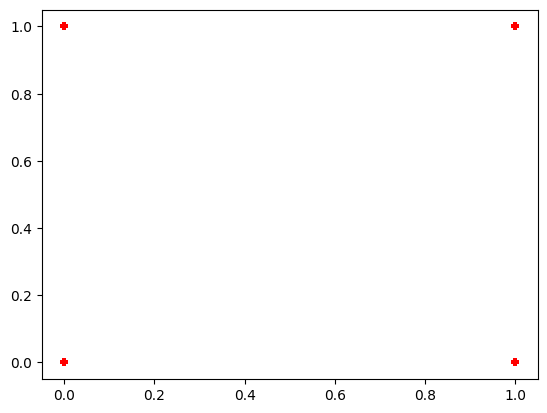

In [60]:
plt.scatter(df['Survived'], df['Sex'], marker='+', color='red')

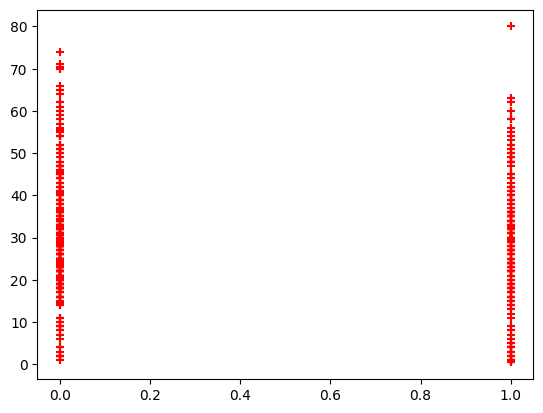

In [61]:
plt.scatter(df['Survived'],df['Age'], marker='+', color='red')

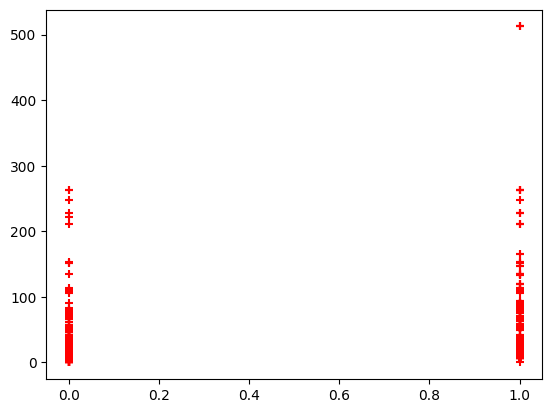

In [62]:
plt.scatter(df['Survived'],df['Fare'], marker='+', color='red')